In [2]:
#Q.1 Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('E:\Susmita_Backup\Data Science Course\Data Science Assignment\Decision Tree\Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [23]:
import seaborn as sns

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

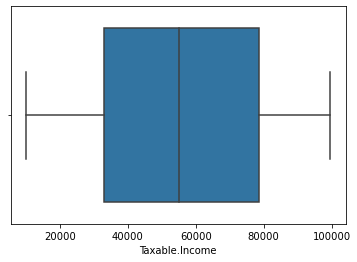

In [8]:
sns.boxplot(df['Taxable.Income'])

In [4]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [5]:
df=df.replace(('YES','NO'),(1,0))

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [7]:
data=df[['Taxable.Income','City.Population','Work.Experience','Undergrad','Marital.Status','Urban']]
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,68833,50047,10,0,2,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,2,1
4,81002,27533,28,0,1,0


In [8]:
#taxable income is <=30000 means Risky(0) otherwise Good(1)
data['Taxable.Income']=[0 if i<=30000 else 1 for i in data['Taxable.Income']]
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
595,1,39492,7,1,0,1
596,1,55369,2,1,0,1
597,1,154058,0,0,0,1
598,1,180083,17,1,1,0


# Taxable_Income <= 30000 as “Risky=0” and others are “Good=1”

# Remove_Outliers

In [10]:
from sklearn.ensemble import IsolationForest

In [11]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=10)

In [12]:
# predictions
x_pred_outliers = clf.predict(data)

In [13]:
x_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [14]:
data['anomaly']=clf.predict(data)

In [15]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,anomaly
0,1,50047,10,0,2,1,1
1,1,134075,18,1,0,1,1
2,1,160205,30,0,1,1,1
3,1,193264,15,1,2,1,1
4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,1,1
596,1,55369,2,1,0,1,1
597,1,154058,0,0,0,1,1
598,1,180083,17,1,1,0,1


In [16]:
data[data.anomaly ==-1]


,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,anomaly
16,0,34551,29,1,0,0,-1
34,0,183767,1,1,0,1,-1
126,0,195022,3,1,0,1,-1
168,0,167629,30,0,0,0,-1
280,0,33184,1,0,0,0,-1
541,0,191874,30,1,0,1,-1


In [17]:
data= data.drop(data.index[[16,34,126,168,280,541]],axis=0).reset_index()

In [18]:
data

,index,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,anomaly
0,0,1,50047,10,0,2,1,1
1,1,1,134075,18,1,0,1,1
2,2,1,160205,30,0,1,1,1
3,3,1,193264,15,1,2,1,1
4,4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...,...
589,595,1,39492,7,1,0,1,1
590,596,1,55369,2,1,0,1,1
591,597,1,154058,0,0,0,1,1
592,598,1,180083,17,1,1,0,1


In [19]:
data= data.drop(['index', 'anomaly'], axis=1)

In [20]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
589,1,39492,7,1,0,1
590,1,55369,2,1,0,1
591,1,154058,0,0,0,1
592,1,180083,17,1,1,0


In [21]:
data['Taxable.Income'].value_counts()

1    476
0    118
Name: Taxable.Income, dtype: int64

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


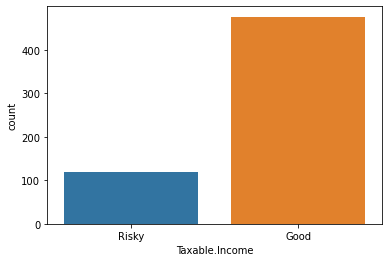

In [24]:
# visualize the target variable
g = sns.countplot(data['Taxable.Income'])
g.set_xticklabels(["Risky","Good"])
plt.show()

In [42]:
#!pip install -U imbalanced-learn
#import imblearn

# Split data into train-test split

In [63]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [64]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)

In [52]:
Xtrain.shape, Xtest.shape,ytrain.shape,ytest.shape

((475, 5), (119, 5), (475,), (119,))

# Building model using Entropy Criterion

In [53]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [54]:
pred = model.predict(Xtest)
pd.Series(pred).value_counts()

1    105
0     14
dtype: int64

In [55]:
pd.crosstab(ytest,pred)

col_0,0,1
Taxable.Income,,
0,3,23
1,11,82


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [57]:
acc = accuracy_score(ytest, pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, pred)

Accuracy = 71.42857142857143


array([[ 3, 23],
       [11, 82]], dtype=int64)

In [58]:
np.mean(pred==ytest)

0.7142857142857143

In [59]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.21      0.12      0.15        26
           1       0.78      0.88      0.83        93

    accuracy                           0.71       119
   macro avg       0.50      0.50      0.49       119
weighted avg       0.66      0.71      0.68       119



# Building model using Gini Criteria

In [65]:
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=10)
model_gini.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=10)

In [66]:
pred1 = model_gini.predict(Xtest)     # Predicted Data
pd.Series(pred1).value_counts() 

1    104
0     15
dtype: int64

In [67]:
acc = accuracy_score(ytest, pred1) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, pred1)

Accuracy = 70.58823529411765


array([[ 3, 23],
       [12, 81]], dtype=int64)

In [68]:
np.mean(pred1==ytest)

0.7058823529411765

In [69]:
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.20      0.12      0.15        26
           1       0.78      0.87      0.82        93

    accuracy                           0.71       119
   macro avg       0.49      0.49      0.48       119
weighted avg       0.65      0.71      0.67       119



# Grid Search CV

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(3, 150)}]
model1 = DecisionTreeClassifier()
estimator = model1

clf = GridSearchCV(estimator,tree_param, cv=10)
clf.fit(x,y)

print(clf.best_score_)
print(clf.best_params_)

0.7996327683615819
{'criterion': 'gini', 'max_depth': 3}


In [71]:
tree_param1 = [{'min_samples_split':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150],'min_samples_leaf':[2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120,150]}]
clf2= GridSearchCV(estimator,tree_param1, cv=10)
clf2.fit(x,y)
print(clf2.best_score_)
print(clf2.best_params_)

0.8014124293785312
{'min_samples_leaf': 11, 'min_samples_split': 150}


In [72]:
clf.best_params_,clf2.best_params_

({'criterion': 'gini', 'max_depth': 3},
 {'min_samples_leaf': 11, 'min_samples_split': 150})

# fitting model based on this data

In [77]:
model_entropy_CV = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=150)
model_entropy_CV.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=150)

In [78]:
pred_cv = model_entropy_CV.predict(Xtest)     # Predicted Data
pd.Series(pred_cv).value_counts()

1    119
dtype: int64

In [79]:
acc = accuracy_score(ytest, pred_cv) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, pred_cv)

Accuracy = 78.15126050420169


array([[ 0, 26],
       [ 0, 93]], dtype=int64)

In [80]:
np.mean(pred_cv==ytest)*100

78.15126050420169

In [ ]:
#use this data for cross validationn

# Model Validation

In [83]:
# 1.Evaluate using a train and a test set

model =DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
model.fit(Xtrain,ytrain)
result = model.score(Xtest,ytest)
result*100                                 

78.15126050420169

In [85]:
# 2.Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10
seed = 200

kfold = KFold(n_splits=num_folds, random_state=None)
model2=DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
results = cross_val_score(model2,x,y, cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

80.15819209039549
6.594060239204076


In [87]:
# Evaluate using Leave One Out Cross Validation

from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
model3 = DecisionTreeClassifier(criterion = 'gini',max_depth=3, min_samples_split=150,min_samples_leaf=11)
results = cross_val_score(model3,x,y,cv=loocv)

print(results.mean()*100.0)
print(results.std()*100)

80.13468013468014
39.898634728277536


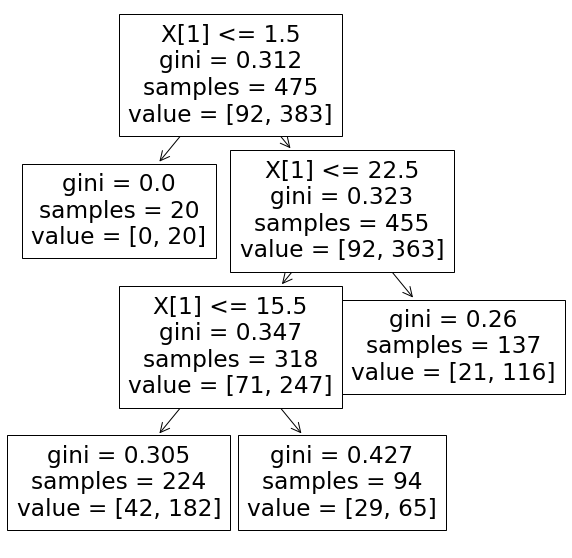

In [91]:
from sklearn import tree
plt.figure(figsize=(10,10))
model_L = DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=11,min_samples_split=150)
tree.plot_tree(model_L.fit(Xtrain,ytrain));